This experiment purpose transfer learning. Using different models with origin (broadcast-news) data

### data

In [1]:
import matplotlib.pyplot as plt

In [2]:
!ls "data/opennmt/all_2"

test_src.txt  train_src.txt valid_src.txt
test_tgt.txt  train_tgt.txt valid_tgt.txt


In [3]:
lens_br = []
with(open("data/opennmt/all_2/train_src.txt", "r")) as f:
    while True:
        l = f.readline()
        if not l:
            break
        lens_br.append(len(l))

lens_news = []
with(open("data/opennmt/all_2/train_tgt.txt", "r")) as f:
    while True:
        l = f.readline()
        if not l:
            break
        lens_news.append(len(l))


All broadcasts:  6143


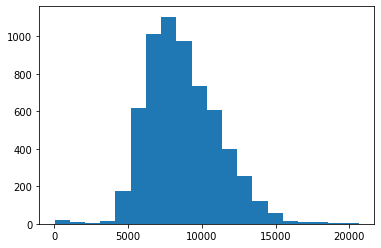

In [4]:
print("All broadcasts: ", len(lens_br));
plt.hist(lens_br, bins=20);

All news:  6143


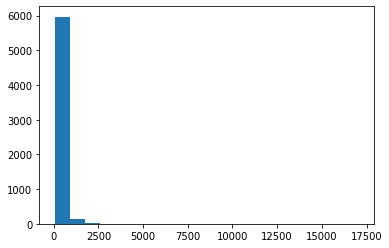

In [5]:
print("All news: ", len(lens_news));
plt.hist(lens_news, bins=20);

In [6]:
! python "/data/denisogr/opennmt/OpenNMT/preprocess.py" \
-train_src "/data/denisogr/opennmt/origin/source/train_src.txt" \
-train_tgt "/data/denisogr/opennmt/origin/source/train_tgt.txt" \
-valid_src "/data/denisogr/opennmt/origin/source/valid_src.txt" \
-valid_tgt "/data/denisogr/opennmt/origin/source/valid_tgt.txt" \
-save_data "/data/denisogr/opennmt/origin/data/data" \
-share_vocab \
-dynamic_dict \
-src_vocab_size 50000 \
-report_every 1000 \
-shard_size 1000 \
-src_seq_length 20000 \
-src_seq_length_trunc 15000 \
-tgt_seq_length 2500 \
-tgt_seq_length_trunc 2000

python: can't open file '/data/denisogr/opennmt/OpenNMT/preprocess.py': [Errno 2] No such file or directory


### sport.ru news vs news 1

In [ ]:
! python "/data/denisogr/opennmt/OpenNMT/train.py" \
-data "/data/denisogr/opennmt/origin/data/data" \
-save_model "/data/denisogr/opennmt/transfer_learning_1/model/s_n_vs_n_1" \
-train_from "/data/denisogr/opennmt/sport_ru_news_vs_news_1/model/model_step_100000.pt" \
-share_embeddings \
-batch_type tokens \
-batch_size 32 \
-valid_batch_size 2 \
-copy_attn \
-global_attention mlp \
-word_vec_size 128 \
-rnn_size 512 \
-layers 1 \
-encoder_type brnn \
-max_grad_norm 2 \
-dropout 0. \
-optim adagrad \
-adagrad_accumulator_init 0.1 \
-reuse_copy_attn \
-copy_loss_by_seqlength \
-bridge \
-seed 42 \
-gpu_ranks 0 \
-save_checkpoint_steps 10000 \
-train_steps 200000 \
-learning_rate 0.001 \
-report_every 1000 \
-valid_steps 20000 \
-layers 4 \
-learning_rate 0.01 \
-encoder_type transformer \
-decoder_type transformer \
-rnn_size 128 \
-world_size 1 \
-log_file "/data/denisogr/opennmt/transfer_learning_1/log/s_n_vs_n_1"

In [ ]:
python "/data/denisogr/opennmt/OpenNMT/translate.py" \
-model "/data/denisogr/opennmt/transfer_learning_1/model/s_n_vs_n_1_step_200000.pt" \
-src "/data/denisogr/opennmt/origin/source/test_src.txt" \
-tgt "/data/denisogr/opennmt/origin/source/test_tgt.txt" \
-output "/data/denisogr/opennmt/origin/source/test_s_n_vs_n_1_result.txt" \
-beam_size 10 \
-dynamic_dict \
-share_vocab \
-batch_size 2 \
-batch_type sents \
-gpu 0 \
-seed 42

````
главный тренер <unk> <unk> <unk> поделился впечатлениями от матча чемпионата <unk> с <unk> 
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>│ <unk> <unk> <unk> 
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 
<unk> <unk> <unk> <unk> <unk>
```

### sport.ru news vs news 2

In [ ]:
! python "/data/denisogr/opennmt/OpenNMT/train.py" \
-data "/data/denisogr/opennmt/origin/data/data" \
-save_model "/data/denisogr/opennmt/transfer_learning_1/model/s_n_vs_n_2" \
-train_from "/data/denisogr/opennmt/sport_ru_news_vs_news_2/model/model_step_100000.pt" \
-share_embeddings \
-batch_type tokens \
-batch_size 32 \
-valid_batch_size 2 \
-copy_attn \
-global_attention mlp \
-word_vec_size 128 \
-rnn_size 512 \
-layers 1 \
-encoder_type brnn \
-max_grad_norm 2 \
-dropout 0. \
-optim adagrad \
-adagrad_accumulator_init 0.1 \
-reuse_copy_attn \
-copy_loss_by_seqlength \
-bridge \
-seed 42 \
-gpu_ranks 0 \
-save_checkpoint_steps 10000 \
-train_steps 200000 \
-learning_rate 0.001 \
-report_every 1000 \
-valid_steps 20000 \
-layers 4 \
-learning_rate 0.01 \
-encoder_type transformer \
-decoder_type transformer \
-rnn_size 128 \
-world_size 1 \
-log_file "/data/denisogr/opennmt/transfer_learning_1/log/s_n_vs_n_2"

In [ ]:
python "/data/denisogr/opennmt/OpenNMT/translate.py" \
-model "/data/denisogr/opennmt/transfer_learning_1/model/s_n_vs_n_2_step_200000.pt" \
-src "/data/denisogr/opennmt/origin/source/test_src.txt" \
-tgt "/data/denisogr/opennmt/origin/source/test_tgt.txt" \
-output "/data/denisogr/opennmt/origin/source/test_s_n_vs_n_2_result.txt" \
-beam_size 10 \
-dynamic_dict \
-share_vocab \
-batch_size 2 \
-batch_type sents \
-gpu 0 \
-seed 42

````
в с с с с с - - - - - - - - - с - с - с - с с с с - с с - с с с - с с с с - с с с с - с с с с - с с с с с - с с с с с с - с с с с с с с - с с с с с с с с с - с с с с с с с с с с - с с с с с с с с с в
в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в
в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в в
```

### ria_2 news vs title

In [ ]:
! python "/data/denisogr/opennmt/OpenNMT/train.py" \
-data "/data/denisogr/opennmt/origin/data/data" \
-save_model "/data/denisogr/opennmt/transfer_learning_1/model/ria_2" \
-train_from "/data/denisogr/opennmt/ria_2_sources/model/model_step_100000.pt" \
-share_embeddings \
-batch_type tokens \
-batch_size 32 \
-valid_batch_size 2 \
-copy_attn \
-global_attention mlp \
-word_vec_size 128 \
-rnn_size 512 \
-layers 1 \
-encoder_type brnn \
-max_grad_norm 2 \
-dropout 0. \
-optim adagrad \
-adagrad_accumulator_init 0.1 \
-reuse_copy_attn \
-copy_loss_by_seqlength \
-bridge \
-seed 42 \
-gpu_ranks 0 \
-save_checkpoint_steps 10000 \
-train_steps 200000 \
-learning_rate 0.001 \
-report_every 1000 \
-valid_steps 20000 \
-layers 4 \
-learning_rate 0.01 \
-encoder_type transformer \
-decoder_type transformer \
-rnn_size 128 \
-world_size 1 \
-log_file "/data/denisogr/opennmt/transfer_learning_1/log/ria_2"

In [ ]:
python "/data/denisogr/opennmt/OpenNMT/translate.py" \
-model "/data/denisogr/opennmt/transfer_learning_1/model/ria_2_step_200000.pt" \
-src "/data/denisogr/opennmt/origin/source/test_src.txt" \
-tgt "/data/denisogr/opennmt/origin/source/test_tgt.txt" \
-output "/data/denisogr/opennmt/origin/source/test_ria_2_result.txt" \
-beam_size 10 \
-dynamic_dict \
-share_vocab \
-batch_size 2 \
-batch_type sents \
-gpu 0 \
-seed 42

```
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
```

### title by first sentence + BPE

Source: https://github.com/deepvk/headline_gen_onmt

Encoding all_2/* to all_2/*.bpe

In [14]:
import sentencepiece as spm
from nltk.tokenize import sent_tokenize
from tqdm import tqdm_notebook

def encode_bpe(model, inp, out):
    """
    borrowed from https://github.com/deepvk/headline_gen_onmt/blob/master/bpe.py
    """
    sp = spm.SentencePieceProcessor()
    sp.load(model)
    with open(inp, encoding="utf-8") as fin:
         with open(out, "wt", encoding="utf-8") as fout:
            for line in tqdm_notebook(fin):
                sents = sent_tokenize(line.strip())
                enc_line = ""
                for sent in sents:
                    enc_line += " ".join(sp.EncodeAsPieces(sent))
                fout.write(enc_line + "\n")


In [8]:
!ls ./headline_gen_onmt

Dockerfile                  ria-model_40_step_100000.pt
LICENSE                     ria.model
README.md                   ria.vocab
Untitled.ipynb              run.sh
bpe.py                      unbpe.py


In [9]:
!ls "./data/opennmt/transfer_learning_1/bpe/bpe_1"

ria.model ria.vocab


In [10]:
!ls ./data/opennmt/all_2

test_src.txt  train_src.txt valid_src.txt
test_tgt.txt  train_tgt.txt valid_tgt.txt


In [15]:
model="./data/opennmt/transfer_learning_1/bpe/bpe_1/ria.model"
encode_bpe(model, "./data/opennmt/all_2/test_src.txt", "./data/opennmt/transfer_learning_1/source/bpe_1/test_src.bpe")
           
           

In [16]:
encode_bpe(model, "./data/opennmt/all_2/test_tgt.txt", "./data/opennmt/transfer_learning_1/source/bpe_1/test_tgt.bpe")
encode_bpe(model, "./data/opennmt/all_2/train_src.txt", "./data/opennmt/transfer_learning_1/source/bpe_1/train_src.bpe")
encode_bpe(model, "./data/opennmt/all_2/train_tgt.txt", "./data/opennmt/transfer_learning_1/source/bpe_1/train_tgt.bpe")
encode_bpe(model, "./data/opennmt/all_2/valid_src.txt", "./data/opennmt/transfer_learning_1/source/bpe_1/valid_src.bpe")
encode_bpe(model, "./data/opennmt/all_2/valid_tgt.txt", "./data/opennmt/transfer_learning_1/source/bpe_1/valid_tgt.bpe")


In [17]:
!wc -l ./data/opennmt/transfer_learning_1/source/bpe_1/train_src.bpe
!wc -l ./data/opennmt/transfer_learning_1/source/bpe_1/train_tgt.bpe
!wc -l ./data/opennmt/transfer_learning_1/source/bpe_1/test_src.bpe
!wc -l ./data/opennmt/transfer_learning_1/source/bpe_1/test_tgt.bpe
!wc -l ./data/opennmt/transfer_learning_1/source/bpe_1/valid_src.bpe
!wc -l ./data/opennmt/transfer_learning_1/source/bpe_1/valid_tgt.bpe

    6143 ./data/opennmt/transfer_learning_1/source/bpe_1/train_src.bpe
    6143 ./data/opennmt/transfer_learning_1/source/bpe_1/train_tgt.bpe
     767 ./data/opennmt/transfer_learning_1/source/bpe_1/test_src.bpe
     767 ./data/opennmt/transfer_learning_1/source/bpe_1/test_tgt.bpe
     760 ./data/opennmt/transfer_learning_1/source/bpe_1/valid_src.bpe
     760 ./data/opennmt/transfer_learning_1/source/bpe_1/valid_tgt.bpe


In [ ]:
! python "/data/denisogr/opennmt/OpenNMT/preprocess.py" \
-train_src "/data/denisogr/opennmt/origin/source/bpe_1/train_src.bpe" \
-train_tgt "/data/denisogr/opennmt/origin/source/bpe_1/train_tgt.bpe" \
-valid_src "/data/denisogr/opennmt/origin/source/bpe_1/valid_src.bpe" \
-valid_tgt "/data/denisogr/opennmt/origin/source/bpe_1/valid_tgt.bpe" \
-save_data "/data/denisogr/opennmt/origin/data/bpe_1" \
-share_vocab \
-dynamic_dict \
-src_vocab_size 50000 \
-report_every 1000 \
-shard_size 1000 \
-src_seq_length 20000 \
-src_seq_length_trunc 15000 \
-tgt_seq_length 2500 \
-tgt_seq_length_trunc 2000

In [ ]:
! python "/data/denisogr/opennmt/OpenNMT-old/train.py" \
-data "/data/denisogr/opennmt/origin/data/bpe_1" \
-save_model "/data/denisogr/opennmt/transfer_learning_1/model/bpe_1" \
-train_from "/data/denisogr/opennmt/transfer_learning_1/model/ria-model_40_step_100000.pt" \
-share_embeddings \
-batch_type tokens \
-batch_size 32 \
-valid_batch_size 2 \
-copy_attn \
-global_attention mlp \
-word_vec_size 128 \
-rnn_size 512 \
-layers 1 \
-encoder_type brnn \
-max_grad_norm 2 \
-dropout 0. \
-optim adagrad \
-adagrad_accumulator_init 0.1 \
-reuse_copy_attn \
-copy_loss_by_seqlength \
-bridge \
-seed 42 \
-gpu_ranks 0 \
-save_checkpoint_steps 10000 \
-train_steps 200000 \
-learning_rate 0.001 \
-report_every 1000 \
-valid_steps 20000 \
-layers 4 \
-learning_rate 0.01 \
-encoder_type transformer \
-decoder_type transformer \
-rnn_size 128 \
-world_size 1 \
-log_file "/data/denisogr/opennmt/transfer_learning_1/log/bpe_1"